# 2nd NLP Twitter model by Angelo Mauro Calderon

I will work in this project with Natural Processing Languaje for a Twitter's Sarcasm Detection model.

The dataset taken from:
Kaggle: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

This file contains a lot of twitter's recompilation wich many comments has a Sarcastic intenction and I will look for a solution to how identify these sarcastics comments trying to study this phenomenon.


In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA


In [4]:
import warnings
warnings.simplefilter( action = 'ignore' )

In [5]:
from google.colab import files
updated = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset (2).json


In [6]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset.json',  lines = True)
dataset.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [7]:
dataset.shape

(26709, 3)

In [8]:
index_random = np.random.randint(0 , high = dataset.shape[0])

header = dataset.iloc[index_random].headline

print( index_random , header )

18494 12 delicious marcel duchamp quotes to unleash your inner artist


Is sarcastic?

In [9]:
print( index_random , dataset.iloc[index_random].is_sarcastic )

18494 0


Null values?

In [10]:
dataset.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


Duplicated values?

In [12]:
dataset['headline'].duplicated().sum()

107

Let's drop out duplicated values

In [13]:
dataset = dataset.drop(dataset[dataset['headline'].duplicated()].index , axis = 0)

In [14]:
dataset['headline'].duplicated().sum()

0

'is_sarcastic' column distribution

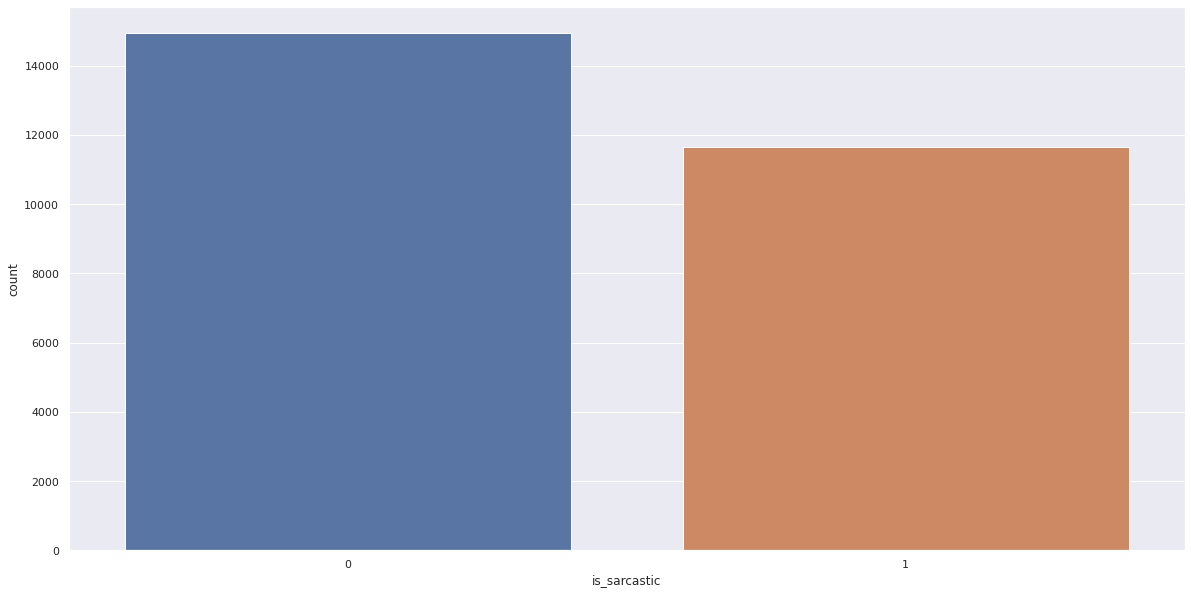

In [15]:
plt.figure( figsize = [20,10] )
sns.countplot( dataset.is_sarcastic )

Aggrupating all the unique binary values creating a dataframe for each one.

# Tokenize and drop out stopwords

In [16]:
filterr = []

if True:
  filterr.append('u')
  filterr.append('new')

In [17]:
data_no_sarcasm = dataset[dataset.is_sarcastic == 0]
data_no_sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


I will specify two empty lists an then adding one per one value according to its headline's content already tokenized and the stopwords filtered:

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
all_no_sarcasm_headline = []
for i in range(data_no_sarcasm.shape[0]):
    headln = data_no_sarcasm.iloc[i].headline
    headln = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(headln)
    headln = [word for word in headln if word not in stopwords]
    headln = [word for word in headln if word not in filterr]

    all_no_sarcasm_headline.append(headln)

In [20]:
all_no_sarcasm_headline = list(itertools.chain(*all_no_sarcasm_headline))

all_no_sarcasm_headline[0 : 10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

Now, order by frequency distribution of each word...

In [21]:
freq_no_sarcasm = nltk.FreqDist(all_no_sarcasm_headline)
freq_no_sarcasm

FreqDist({'trump': 1446, 'donald': 458, 'says': 349, 'women': 305, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, 'people': 241, ...})

Transform that frequency into DataFrame

In [22]:
df_no_sarcasm = pd.DataFrame(list(freq_no_sarcasm.items()), columns = ['Word' , 'Frequency'])
df_no_sarcasm.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


Ordering the frequency's word values:

In [23]:
df_no_sarcasm.sort_values( 'Frequency' , ascending = False , inplace = True )
df_no_sarcasm.head()

,Word,Frequency
46,trump,1446
229,donald,458
421,says,349
29,women,305
258,one,268


...and reset all the index values

In [24]:
df_no_sarcasm.reset_index( drop = True, inplace = True )
df_no_sarcasm.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,says,349
3,women,305
4,one,268


Visualize it

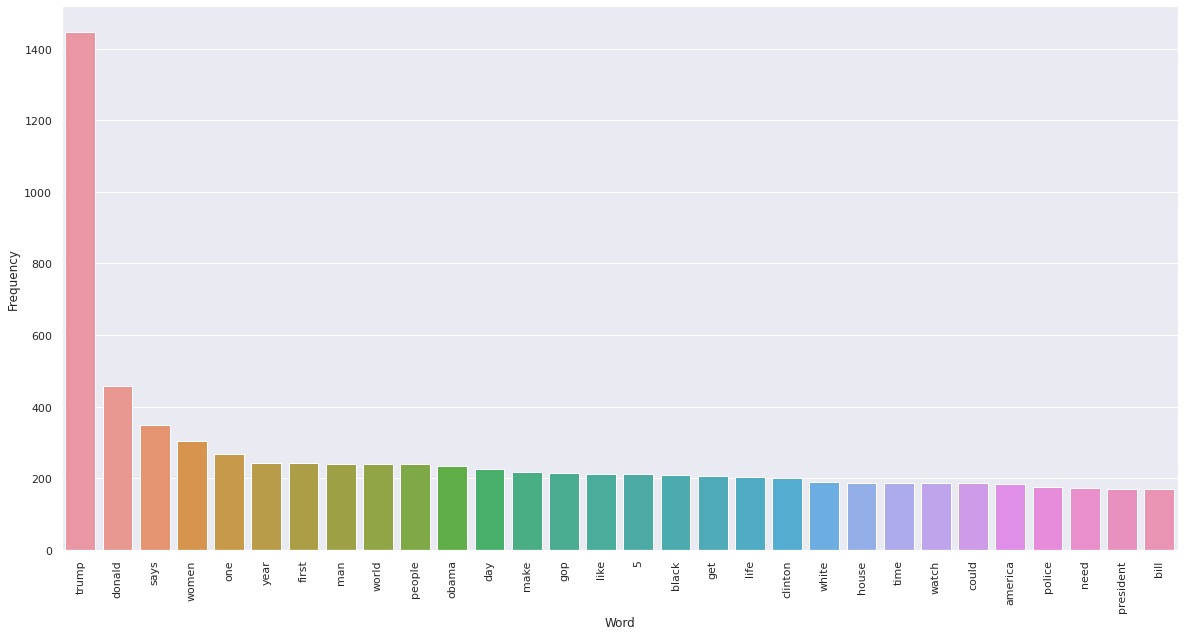

In [25]:
plt.figure( figsize = [20,10] )
plot = sns.barplot( x = df_no_sarcasm[:30].Word , y = df_no_sarcasm[:30].Frequency )
for item in plot.get_xticklabels():
  item.set_rotation(90)
plt.show()  

Secondly, the same transform way for SARCASM:

In [26]:
data_sarcasm = dataset[dataset.is_sarcastic == 1]
data_sarcasm.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [27]:
all_sarcasm_headline = []

for i in range(data_sarcasm.shape[0]):
  headln = data_sarcasm.iloc[i].headline
  headln = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(headln)
  headln = [word for word in headln if word not in stopwords]
  headln = [word for word in headln if word not in filterr]

  all_sarcasm_headline.append(headln)

In [28]:
all_sarcasm_headline = list(itertools.chain(*all_sarcasm_headline))
all_sarcasm_headline[0:10]

['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner']

Now, order by frequency distribution of each word...

In [29]:
freq_sarcasm = nltk.FreqDist(all_sarcasm_headline)
freq_sarcasm

FreqDist({'man': 1144, 'area': 474, 'report': 426, 'nation': 331, 'woman': 317, 'year': 307, 'one': 272, 'old': 267, 'time': 250, 'day': 243, ...})

and transform that frequency into dataframe

In [30]:
df_sarcasm = pd.DataFrame(list(freq_sarcasm.items()), columns = ['Word' , 'Frequency'])
df_sarcasm.head()

,Word,Frequency
0,mom,117
1,starting,32
2,fear,16
3,son,71
4,web,7


Ordering the frequency's word values:


In [31]:
df_sarcasm.sort_values( 'Frequency' , ascending = False , inplace = True )
df_sarcasm.head()

,Word,Frequency
30,man,1144
182,area,474
157,report,426
56,nation,331
183,woman,317


...and reset all the index values

In [32]:
df_sarcasm.reset_index( drop = True, inplace = True )
df_sarcasm.head()

,Word,Frequency
0,man,1144
1,area,474
2,report,426
3,nation,331
4,woman,317


Visualizing it

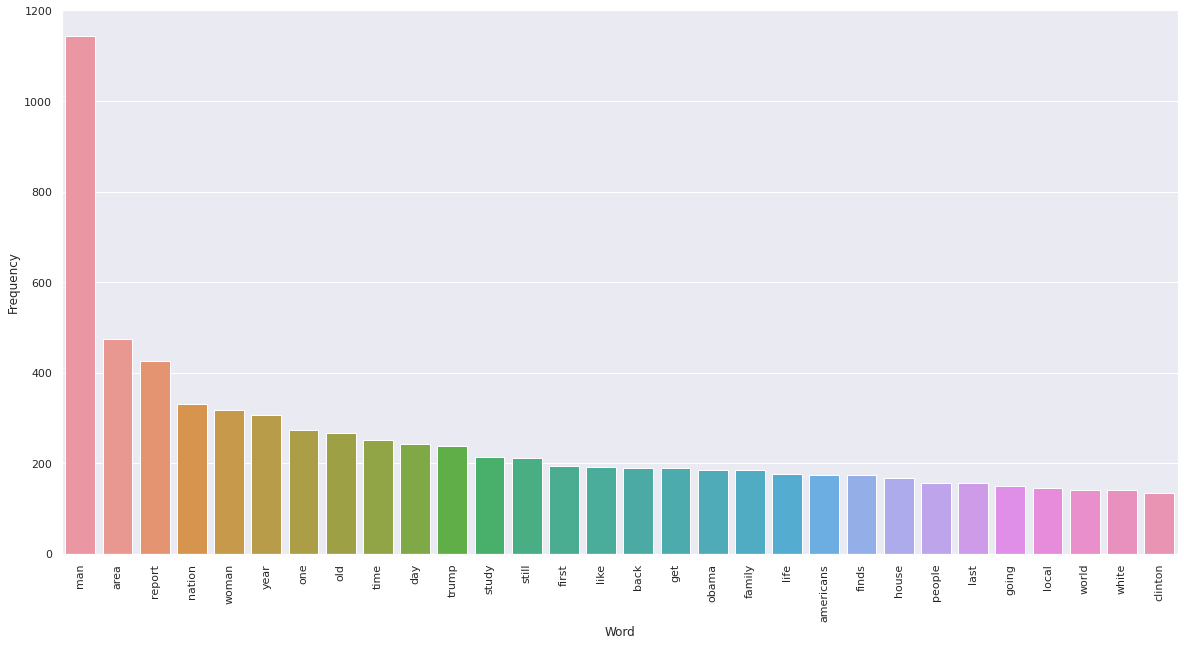

In [33]:
plt.figure( figsize = [20,10] )
plot = sns.barplot( x = df_sarcasm[:30].Word , y = df_sarcasm[:30].Frequency)
for item in plot.get_xticklabels():
  item.set_rotation(90)
plt.show()  

# Stemmize

I will make the stemming transformation grouping the words to its respective roots

In [34]:
dataset2 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
dataset2.sample(10)

,article_link,headline,is_sarcastic
23616,https://www.huffingtonpost.com/entry/what-i-di...,what i did over the holidays that would make s...,0
19127,https://www.huffingtonpost.com/entry/to-the-mo...,to the mom who feels unseen,0
6646,https://sports.theonion.com/eleven-year-old-us...,eleven-year-old used as human shield in dodgeb...,1
11483,https://www.theonion.com/not-even-julian-assan...,not even julian assange clear on what's going ...,1
4260,https://www.huffingtonpost.com/entry/pope-fran...,pope francis says his time as pope will be sho...,0
6313,https://www.huffingtonpost.com/entry/second-ha...,can the green bay packers get back on track in...,0
22217,https://politics.theonion.com/condoleezza-rice...,condoleezza rice's lunch missing,1
2427,https://local.theonion.com/job-applicant-blows...,job applicant blows away interviewer with inti...,1
20907,https://local.theonion.com/roommate-cooked-eno...,roommate cooked enough of gross thing for ever...,1
352,https://www.huffingtonpost.com/entry/washingto...,washington d.c. officer shoots woman carrying ...,0


I think that the unique important column is 'headline' and 'is_sarcastic' so I will drop out 'article_link'

In [35]:
dataset2 = pd.concat([dataset2.headline , dataset2.is_sarcastic] , axis = 1)
dataset2.dropna( axis = 0, inplace = True )
dataset2.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Before stemming process I will normalize taking out the characters that are not words

In [36]:
import re

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [37]:
headline_list = []

for headder in dataset2.headline:

  # Replacing special characters to spaces

  headder = re.sub('[^a-zA-Z]', ' ', str(headder))

  # All words into lower case

  headder = headder.lower()

  # Tokenize words

  headder = nltk.word_tokenize(headder)

  # I think deleting words less than 3 lyrics

  headder = [word for word in headder if len(word) > 3]

  # Now Stemmize it

  # Dropping out stopwords

  headder = [word for word in headder if word not in stopwords]

  # I will apply the function seeking root's words 

  headder = [stemmer.stem(word) for word in headder]

  # # Joining headline

  headline_list.append(headder)


I am going to create a new column into dataset with the stemmized headlines

In [38]:
dataset2['stem_headline'] = headline_list
dataset2.head()

,headline,is_sarcastic,stem_headline
0,former versace store clerk sues over secret 'b...,0,"[former, versac, store, clerk, sue, secret, bl..."
1,the 'roseanne' revival catches up to our thorn...,0,"[roseann, reviv, catch, thorni, polit, mood, b..."
2,mom starting to fear son's web series closest ...,1,"[start, fear, seri, closest, thing, grandchild]"
3,"boehner just wants wife to listen, not come up...",1,"[boehner, want, wife, listen, come, altern, de..."
4,j.k. rowling wishes snape happy birthday in th...,0,"[rowl, wish, snape, happi, birthday, magic]"


Secondly, I will make a new dataset named 'dataset_stem' that contains only 'steam_headline' and 'is_sarcastic' columns

In [39]:
dataset_stem = pd.concat([dataset2.stem_headline , dataset2.is_sarcastic], axis = 1  )
dataset_stem.dropna( axis = 0 , inplace = True )
dataset_stem.head()

,stem_headline,is_sarcastic
0,"[former, versac, store, clerk, sue, secret, bl...",0
1,"[roseann, reviv, catch, thorni, polit, mood, b...",0
2,"[start, fear, seri, closest, thing, grandchild]",1
3,"[boehner, want, wife, listen, come, altern, de...",1
4,"[rowl, wish, snape, happi, birthday, magic]",0


# Lemmatize

At this point, I will try use lemmatizer but it costs me computing resources even it will completely enhance the roots' words so let's see it

In [40]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
dataset3 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)

dataset3 = pd.concat( [dataset3.headline , dataset3.is_sarcastic] , axis = 1 )

dataset3.dropna( inplace = True , axis = 0 )

I will define a function to traduce the values' tags to POS's values that lemmatizer may understand

In [42]:
def get_wordnet_pos(word):
  # Map POS tag to first character lemmatize() accepts'''
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {'J': wordnet.ADJ,
              'N': wordnet.NOUN,
              'V': wordnet.VERB,
              'R': wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

In [43]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
headder3_list = []

for headder3 in dataset3.headline:

  # Replacing characters
  headder3 = re.sub("[^a-zA-Z]", " ", str(headder3))

  # lower case
  headder3 = headder3.lower()

  # Tokenize
  headder3 = nltk.word_tokenize(headder3)
  
  # Lemmatize
  phrase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in headder3]

  # Dropping out words less than 3 lyrics
  headder3 = [word for word in headder3 if len(word) > 3]

  # Dropping out stopwords
  headder3 = [word for word in headder3 if word not in stopwords]

  # joining headlines
  headder3 = ' '.join(headder3)

  headder3_list.append(headder3)

I am going to create a new column into dataset with the lemmatized headlines

In [45]:
dataset3['lemma_headline'] = headder3_list
dataset3.head()

,headline,is_sarcastic,lemma_headline
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,mom starting to fear son's web series closest ...,1,starting fear series closest thing grandchild
3,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wishes snape happy birthday magical


Finally, I will make a new dataset named 'dataset_lemma' that contains only 'lemma_headline' and 'is_sarcastic' columns

In [46]:
dataset_lemma = pd.concat([ dataset3.lemma_headline , dataset3.is_sarcastic], axis = 1)
dataset_lemma.dropna( inplace = True , axis = 0 )
dataset_lemma.head()

,lemma_headline,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


Well, there was a completely exausting lemmatized process dued the consumed time while the internal computing operations was working and I have had to install several NLTK's packages even I will compare the lemmatized and stemmized dataset just for if exists some diferences according its POS's comprehension.

In [47]:
print( dataset_stem.head(2) )
print(dataset_lemma.head(2))

                                       stem_headline  is_sarcastic
0  [former, versac, store, clerk, sue, secret, bl...             0
1  [roseann, reviv, catch, thorni, polit, mood, b...             0
                                      lemma_headline  is_sarcastic
0  former versace store clerk sues secret black c...             0
1  roseanne revival catches thorny political mood...             0


Definitely I can comprove that lemmatized process boost a lot the extractions' words making it a better understanding context.

# Vectorize

I will use the lemmatized dataset and I need to convert every headline into vector where appears a 1 or 0 if contains it.

In [48]:
head_list = list(dataset_lemma['lemma_headline'].values)

is_sarc = dataset_lemma['is_sarcastic'].values

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

In [178]:
# I will use only the 1000 mostly frequency words throughout corpus to generate the vectors
max_features = 5000

# Wich every instance will has 1000 features

cou_vec = CountVectorizer(max_features = max_features)

Furthermore, I guess the deduction to work with the mostly repeated words because these will give me more information than others.

In [179]:
headline_matrix = cou_vec.fit_transform(head_list)

# take words
all_words = cou_vec.get_feature_names_out()

print('The 50 most used words: ' , all_words[0:50])

The 50 most used words:  ['aaron' 'abandoned' 'abdul' 'ability' 'able' 'abortion' 'abortions'
 'abrams' 'abroad' 'absence' 'absolutely' 'abuse' 'abused' 'abusive'
 'academy' 'accept' 'acceptance' 'accepted' 'accepting' 'accepts' 'access'
 'accident' 'accidentally' 'according' 'account' 'accounts' 'accusations'
 'accuse' 'accused' 'accusers' 'accuses' 'achieve' 'aclu' 'acquires'
 'acres' 'across' 'acting' 'action' 'actions' 'active' 'activism'
 'activist' 'activists' 'activity' 'actor' 'actors' 'actress' 'acts'
 'actual' 'actually']


# Modeling

Everything is done for working with a definitive new dataset and start the modeling process

Train - Test:

In [302]:
X = headline_matrix.toarray()

Y = is_sarc

In [303]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42, stratify = Y )

Define a function that allows me plot the results in a confusion matrix

In [304]:
from sklearn.metrics import confusion_matrix

def confusion(y_test,y_pred):
    names=["No Sarcastic","Sarcastic"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Benchmark

I just start with a simple Naive Bayes to get a reference benchmark model for accuracy

In [305]:
from sklearn.naive_bayes import GaussianNB

In [306]:
nb = GaussianNB()
nb.fit(x_train , y_train)
print(' Acc : ' , nb.score(x_test , y_test))

 Acc :  0.7017970797454137


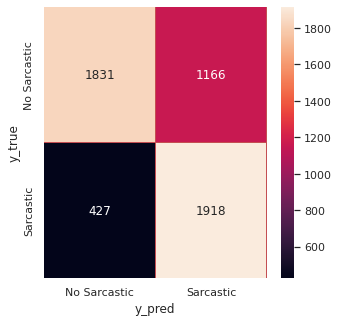

In [307]:
y_pred = nb.predict(x_test)

confusion( y_test , y_pred )

In [308]:
from sklearn.metrics import classification_report

print( classification_report(y_test, y_pred , target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.81      0.61      0.70      2997
   Sarcastic       0.62      0.82      0.71      2345

    accuracy                           0.70      5342
   macro avg       0.72      0.71      0.70      5342
weighted avg       0.73      0.70      0.70      5342



I may say that the most viable evaluating metric is f1-score give me an equilibrated punctuation even though there were more 'No_Sarcastic' data than 'Sarcastic' thou the score is lower and it has to increase...

# Second model

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression( class_weight = 'balanced' )

lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)

In [310]:
from sklearn.metrics import confusion_matrix, classification_report
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ' , acc * 100) 

Accuracy =  78.06065144140771


The accuracy has enhanced but let's see the classification report

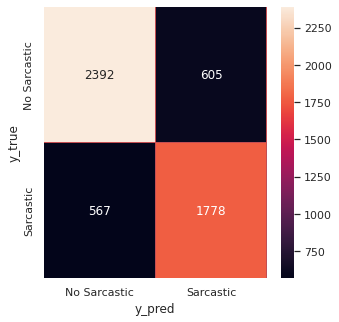

In [311]:
confusion( y_test , y_pred )

In [312]:
print(classification_report(y_test , y_pred, target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.81      0.80      0.80      2997
   Sarcastic       0.75      0.76      0.75      2345

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



Considering the precision is balanced but I would like boosting the f1-score so I will...

#Third model

# Oversampling

In [313]:
from imblearn.over_sampling import SMOTE

In [314]:
oversample = SMOTE(random_state = 42)

X_os , Y_os = oversample.fit_resample(X , Y)

Y_os.shape

(29970,)

In [315]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X_os, Y_os, test_size = 0.25)

# Fourth model

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
rfc = RandomForestClassifier()
rfc.fit( x_train , y_train )

RandomForestClassifier()

In [318]:
y_pred = rfc.predict(x_test)

In [319]:
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ',  acc * 100)

Accuracy =  74.53623381823034


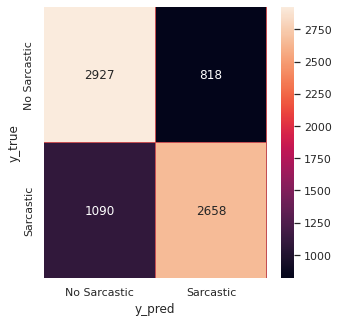

In [320]:
confusion( y_test , y_pred )

In [321]:
print(classification_report(y_test , y_pred, target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.73      0.78      0.75      3745
   Sarcastic       0.76      0.71      0.74      3748

    accuracy                           0.75      7493
   macro avg       0.75      0.75      0.75      7493
weighted avg       0.75      0.75      0.75      7493



Despite have been used oversampling and bagging tool such as Random Forest Classifier the result was not succesfull so I would like to evaluate with ROC CURVE...

In [322]:
r_probs = [0 for _ in range(len(y_test))] # Probability prediction

rfc_probs = rfc.predict_proba(x_test) # Random Forest Classifier probability prediction

lr_probs = lr.predict_proba(x_test) # Logistic Regression probability prediction

rfc_probs = rfc_probs[:,1] # Probability result for  Random Forest positive values are kept 

lr_probs = lr_probs[:,1] # Probability result for  Logistic Regression positive values are kept 

In [323]:
from sklearn.metrics import roc_curve , roc_auc_score

In [324]:
# AUROC calculation

# ROC is the receiver of the operating characteristic
# AUC is the area under the ROC curve

r_auc = roc_auc_score(y_test , r_probs)

rfc_auc = roc_auc_score(y_test , rfc_probs )

lr_auc = roc_auc_score(y_test , lr_probs )

In [325]:
# printing AUROC scores

print( 'Random (chance) prediction: AUROC = %.3f' % (r_auc) )  # This prediction is to show that in the worst case it will predict a 50% mistake
print( 'Random Forest: AUROC = %.3f' % (rfc_auc)) # This is the prediction implemented by the Random Forest Classifier algorithm
print( 'Logistic Regression: AUROC = %.3f' % (lr_auc) ) # This is the prediction implemented by the Logistic Regression algorithm

Random (chance) prediction: AUROC = 0.500
Random Forest: AUROC = 0.824
Logistic Regression: AUROC = 0.907


This evaluation method benefits by a little percentage to Logistic Regression for 83% against 80% of Random Forest Classifier

Let's plot

In [326]:
# ROC curve calculation

r_fpr , r_tpr, _ = roc_curve( y_test , r_probs )

rfc_fpr , rfc_tpr, _ = roc_curve(y_test , rfc_probs)

lr_fpr , lr_tpr, _ = roc_curve(y_test , lr_probs)

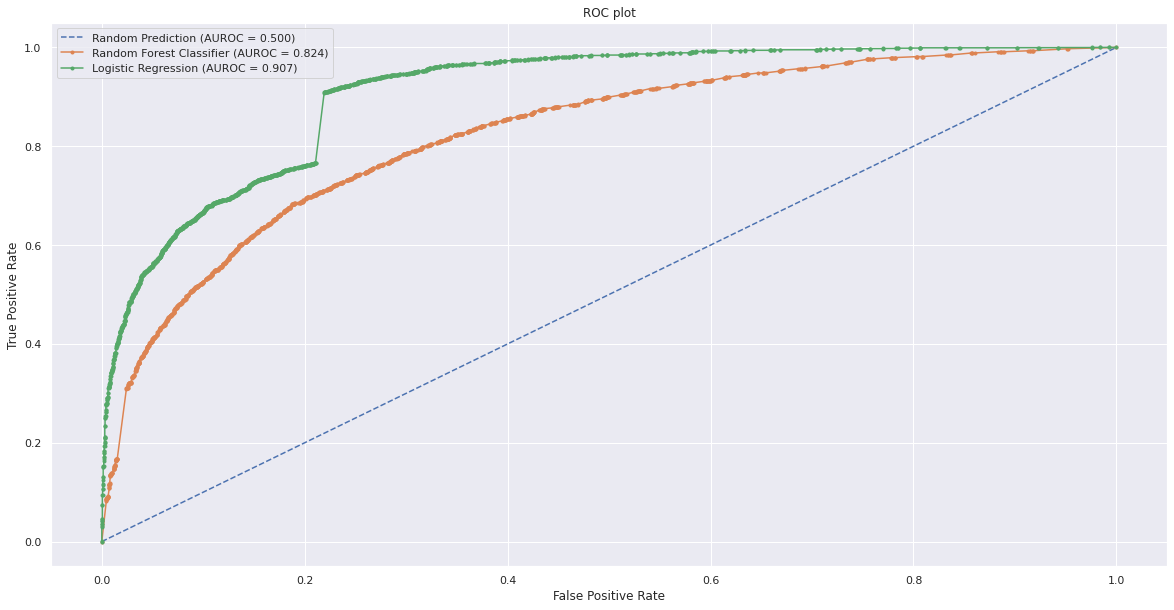

In [327]:
plt.figure( figsize = [20,10] )
plt.plot( r_fpr , r_tpr , linestyle = '--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc )
plt.plot( rfc_fpr , rfc_tpr , marker = '.' , label = 'Random Forest Classifier (AUROC = %0.3f)' % rfc_auc)
plt.plot( lr_fpr , lr_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc )

plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Keeping in mind that has been oversampled the Logistic Regression algorithm, it presents and excellent performance beeing evaluated with ROC CURVE than oversampled Random Forest Classifier algorithm.

Let's model some algorithms just for seeing and analyze differents options and behavoirs.

# Fifth model

In [328]:
from sklearn.neighbors import KNeighborsClassifier

In [329]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit( x_train , y_train )
y_pred = lr.predict(x_test)

In [330]:
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ',  acc * 100)

Accuracy =  78.53997063926332


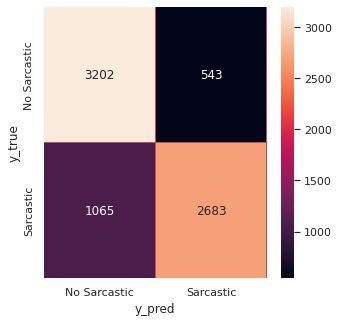

In [331]:
confusion( y_test , y_pred )

In [332]:
print(classification_report(y_test , y_pred, target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.75      0.86      0.80      3745
   Sarcastic       0.83      0.72      0.77      3748

    accuracy                           0.79      7493
   macro avg       0.79      0.79      0.78      7493
weighted avg       0.79      0.79      0.78      7493



In [333]:
r_probs = [0 for _ in range(len(y_test))] # Probability prediction

knn_probs = knn.predict_proba(x_test) # KNN probability prediction

lr_probs = lr.predict_proba(x_test) # Logistic Regression probability prediction

knn_probs = knn_probs[:,1] # Probability result for KNN positive values are kept 

lr_probs = lr_probs[:,1] # Probability result for Logistic Regression positive values are kept 

In [334]:
# AUROC calculation

# ROC is the receiver of the operating characteristic
# AUC is the area under the ROC curve

r_auc = roc_auc_score(y_test , r_probs)

knn_auc = roc_auc_score(y_test , knn_probs )

lr_auc = roc_auc_score(y_test , lr_probs )

In [335]:
# printing AUROC scores

print( 'Random (chance) prediction: AUROC = %.3f' % (r_auc) )  # This prediction is to show that in the worst case it will predict a 50% mistake
print( 'KNN AUROC = %.3f' % (knn_auc)) # This is the prediction implemented by the KNN algorithm
print( 'Logistic Regression: AUROC = %.3f' % (lr_auc) ) # This is the prediction implemented by the Logistic Regression algorithm

Random (chance) prediction: AUROC = 0.500
KNN AUROC = 0.636
Logistic Regression: AUROC = 0.907


In [336]:
# ROC curve calculation

r_fpr , r_tpr, _ = roc_curve( y_test , r_probs )

knn_fpr , knn_tpr, _ = roc_curve(y_test , knn_probs)

lr_fpr , lr_tpr, _ = roc_curve(y_test , lr_probs)

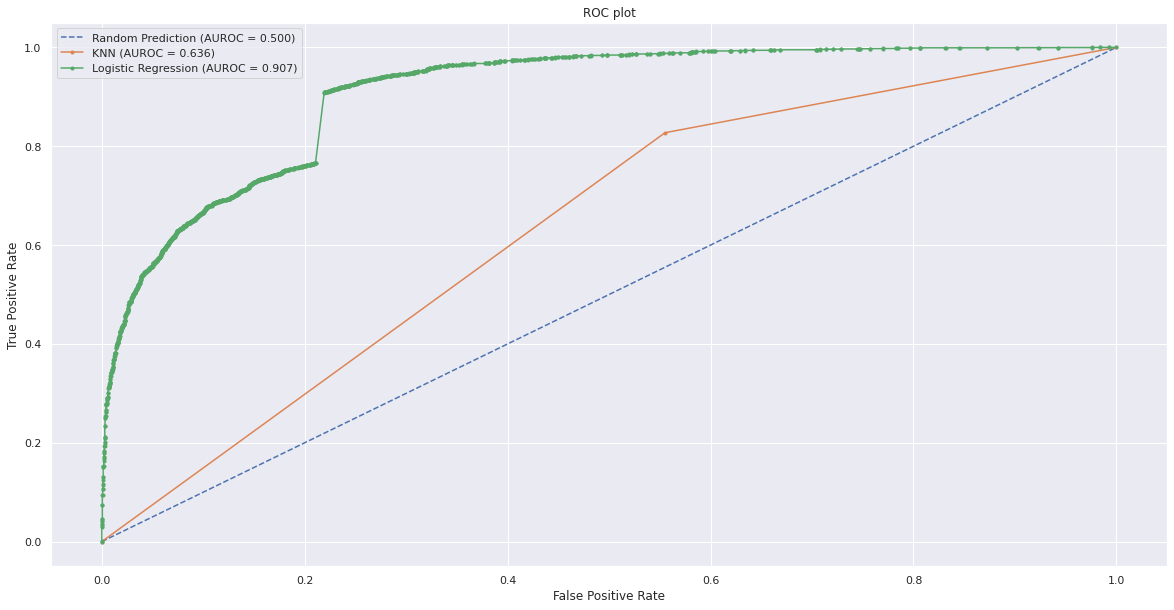

In [337]:
plt.figure( figsize = [20,10] )
plt.plot( r_fpr , r_tpr , linestyle = '--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc )
plt.plot( knn_fpr , knn_tpr , marker = '.' , label = 'KNN (AUROC = %0.3f)' % knn_auc)
plt.plot( lr_fpr , lr_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc )

plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Sixth model

In [338]:
from sklearn.neural_network import MLPClassifier

In [339]:
redes_neuro = MLPClassifier( hidden_layer_sizes= 400, solver = 'adam' )
redes_neuro.fit( x_train , y_train )
y_pred = redes_neuro.predict(x_test)

In [340]:
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ',  acc * 100)

Accuracy =  78.48658748164954


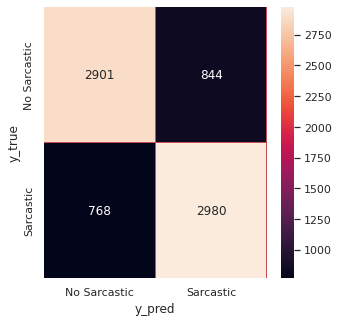

In [341]:
confusion( y_test , y_pred )

In [342]:
print(classification_report(y_test , y_pred, target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.79      0.77      0.78      3745
   Sarcastic       0.78      0.80      0.79      3748

    accuracy                           0.78      7493
   macro avg       0.78      0.78      0.78      7493
weighted avg       0.78      0.78      0.78      7493



In [343]:
r_probs = [0 for _ in range(len(y_test))] # Probability prediction

rn_probs = redes_neuro.predict_proba(x_test) # Neural Network probability prediction

lr_probs = lr.predict_proba(x_test) # Logistic Regression probability prediction

rn_probs = rn_probs[:,1] # Probability result for Neural Network positive values are kept 

lr_probs = lr_probs[:,1] # Probability result for  Logistic Regression positive values are kept 

In [344]:
# AUROC calculation

# ROC is the receiver of the operating characteristic
# AUC is the area under the ROC curve

r_auc = roc_auc_score(y_test , r_probs)

rn_auc = roc_auc_score(y_test , rn_probs )

lr_auc = roc_auc_score(y_test , lr_probs )

In [345]:
# printing AUROC scores

print( 'Random (chance) prediction: AUROC = %.3f' % (r_auc) )  # This prediction is to show that in the worst case it will predict a 50% mistake
print( 'Redes Neuronales: AUROC = %.3f' % (rn_auc)) # This is the prediction implemented by the Neural Network algorithm
print( 'Logistic Regression: AUROC = %.3f' % (lr_auc) ) # This is the prediction implemented by the Logistic Regression algorithm

Random (chance) prediction: AUROC = 0.500
Redes Neuronales: AUROC = 0.851
Logistic Regression: AUROC = 0.907


In [346]:
# ROC curve calculation

r_fpr , r_tpr, _ = roc_curve( y_test , r_probs )

rn_fpr , rn_tpr, _ = roc_curve(y_test , rn_probs)

lr_fpr , lr_tpr, _ = roc_curve(y_test , lr_probs)

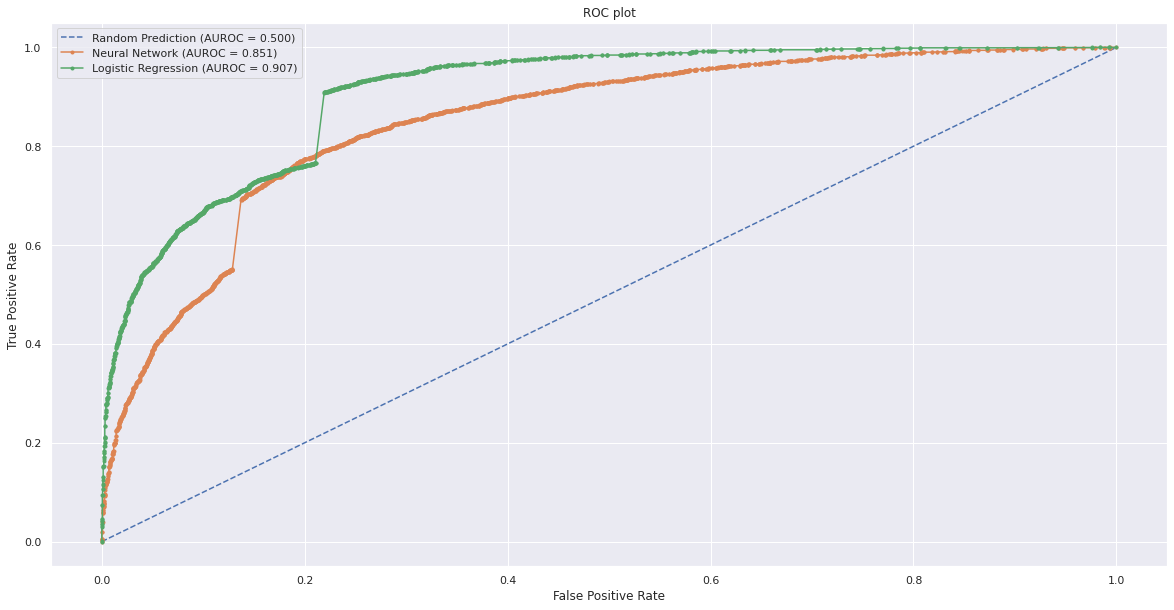

In [347]:
plt.figure( figsize = [20,10] )
plt.plot( r_fpr , r_tpr , linestyle = '--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc )
plt.plot( rn_fpr , rn_tpr , marker = '.' , label = 'Neural Network (AUROC = %0.3f)' % rn_auc)
plt.plot( lr_fpr , lr_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc )

plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Seventh model

In [348]:
from sklearn.naive_bayes import GaussianNB 

In [349]:
nb = GaussianNB()
nb.fit( x_train , y_train  )
y_pred = nb.predict(x_test)

In [350]:
acc = accuracy_score(y_test , y_pred)
print('Accuracy = ',  acc * 100)

Accuracy =  71.22647804617644


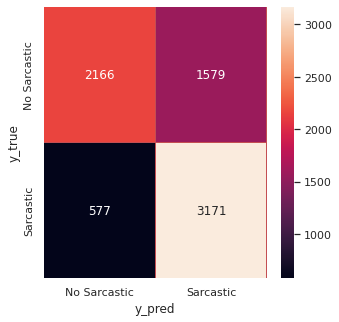

In [351]:
confusion( y_test , y_pred )

In [352]:
print(classification_report(y_test , y_pred, target_names = ['No Sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No Sarcastic       0.79      0.58      0.67      3745
   Sarcastic       0.67      0.85      0.75      3748

    accuracy                           0.71      7493
   macro avg       0.73      0.71      0.71      7493
weighted avg       0.73      0.71      0.71      7493



In [353]:
r_probs = [0 for _ in range(len(y_test))] # Probability prediction

nb_probs = nb.predict_proba(x_test) # NB probability prediction

lr_probs = lr.predict_proba(x_test) # Logistic Regression probability prediction

nb_probs = nb_probs[:,1] # Probability result for NB positive values are kept 

lr_probs = lr_probs[:,1] # Probability result for  Logistic Regression positive values are kept 

In [354]:
# AUROC calculation

# ROC is the receiver of the operating characteristic
# AUC is the area under the ROC curve

r_auc = roc_auc_score(y_test , r_probs)

nb_auc = roc_auc_score(y_test , nb_probs )

lr_auc = roc_auc_score(y_test , lr_probs )

In [355]:
# printing AUROC scores

print( 'Random (chance) prediction: AUROC = %.3f' % (r_auc) )  # This prediction is to show that in the worst case it will predict a 50% mistake
print( 'Naive Bayes: AUROC = %.3f' % (nb_auc)) # This is the prediction implemented by the Naive Bayes algorithm
print( 'Logistic Regression: AUROC = %.3f' % (lr_auc) ) # This is the prediction implemented by the Logistic Regression algorithm

Random (chance) prediction: AUROC = 0.500
Naive Bayes: AUROC = 0.717
Logistic Regression: AUROC = 0.907


In [356]:
# ROC curve calculation

r_fpr , r_tpr, _ = roc_curve( y_test , r_probs )

nb_fpr , nb_tpr, _ = roc_curve(y_test , nb_probs)

lr_fpr , lr_tpr, _ = roc_curve(y_test , lr_probs)

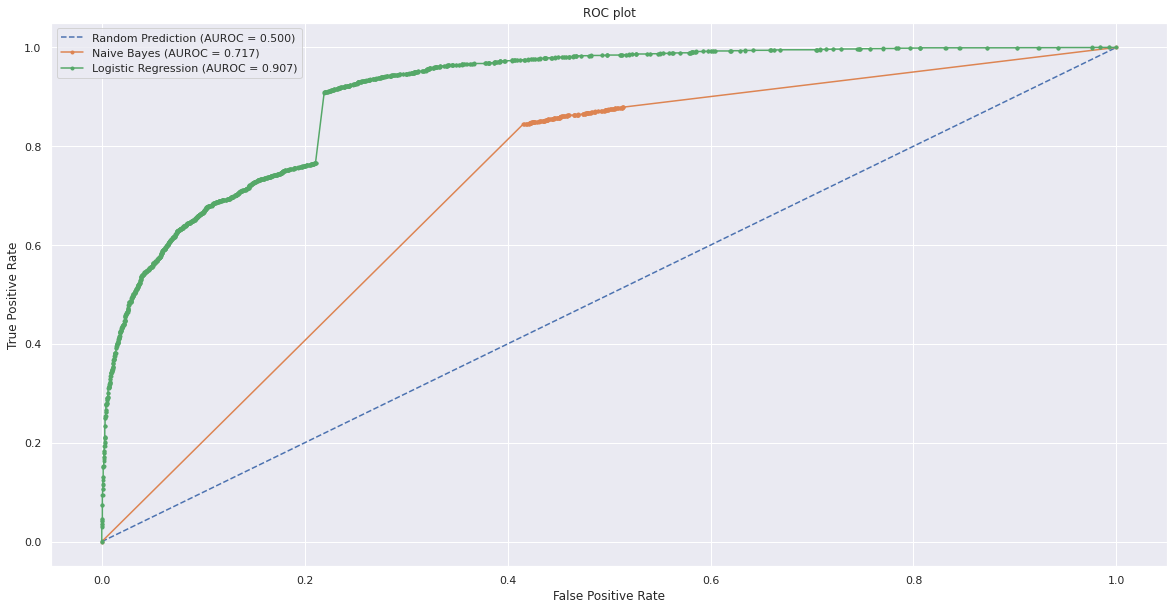

In [357]:
plt.figure( figsize = [20,10] )
plt.plot( r_fpr , r_tpr , linestyle = '--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc )
plt.plot( nb_fpr , nb_tpr , marker = '.' , label = 'Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot( lr_fpr , lr_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % lr_auc )

plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

**I may consider the Logistic Regression model stated with the hiperparameter class_weight = 'balanced' applying the previous metric method (AUROC = 90%) being an ideal model as the solution for this challenge.**

*Mission accomplished*





# Angelo Mauro Calderon.